# This is an example

This is an **example** of how to analyse quantitative data from a usability evaluation. As it is an example only, you should **make any adjustments necessary to suit the data** that you have collected and to ensure that your analysis is relevant to the nature of your technology.

**Use this notebook as a guide and toolkit, but apply critical thinking to decide which analyses best support your project.**

You are able to use Gemini (or another AI Tool) to assist you if you wish. However, you will need to keep track of your usage and include it in your project AI Tool Use Acknowledgement.

# Setup Code


In [8]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
import io
#from google.colab import files

# Import your data

There are a number of ways to do this.  Use the code that will work for you.  For this example, I am loading the excel sheet directly from my laptop.

In [12]:
# --- OPTION 1: If your data is in CSV format ---
# df = pd.read_csv('data.csv')

# --- OPTION 2: If your data is in Excel format (.xlsx) ---
df = pd.read_excel('SUSdata.xlsx')

# uploaded = files.upload()
# filename = next(iter(uploaded.keys()))



# Reading the data

Read the data into a dataframe so that it is accessible within the Colab notebook

In [13]:
# Read the file from the uploaded bytes data

df.head()

,Timestamp,Participant Number,I think that I would like to use this system frequently,I found the system unnecessarily complex,I thought the system was easy to use,I think that I would need the support of a technical person to be able to use this system,I found the various functions in this system were well integrated,I thought there was too much inconsistency in this system,I would imagine that most people would learn to use this system very quickly,I found the system very cumbersome to use,I felt very confident using the system,I needed to learn a lot of things before I could get going with this system
0,2025-09-12 18:19:57.494,B_1,3,2,3,2,3,2,4,2,3,3
1,2025-09-12 18:20:11.342,B_2,4,3,4,3,5,3,5,3,5,2
2,2025-09-12 18:25:13.498,S1,5,2,5,1,2,1,5,1,5,1
3,2025-09-12 18:29:23.844,P1,5,1,5,1,5,1,5,1,5,1
4,2025-09-12 18:30:52.317,B_3,3,1,4,1,4,2,3,2,5,3


# Cleaning Data

The next thing we need to do is make sure all of the data is consistent including the column names.  In some columns we need to make sure the data is actually represented as numbers rather than strings.

In [ ]:
# column name standardisation
df.columns = [c.strip().lower().replace(" ", "_").replace("(", "").replace(")", "") for c in df.columns]

# normalise the common time column if present
if 'completetime_seconds' in df.columns:
    df = df.rename(columns={'completetime_seconds': 'time_sec'})
elif 'complete_time_seconds' in df.columns:
    df = df.rename(columns={'complete_time_seconds': 'time_sec'})

# convert numeric columns safely
num_candidates = ['age','years_in_job','tech_usage_hours_per_week','tech_confidence_1to5','time_sec','errors']
for col in num_candidates:
    if col in df.columns:
        df[col] = pd.to_numeric(df[col], errors='coerce')

df.head(10)

,participant_id,age,language_spoken_at_home,education_level,job_title,years_in_job,tech_usage_hours_per_week,device_most_often,tech_confidence_1to5,time_sec,...,sus9,sus10,ee1,ee2,ee3,ee4,fc1,fc2,fc3,fc4
0,P01,59,English,High school,Residential Aged Care Worker,4.4,16.9,Smartphone,2,45,...,2,3,4,4,5,4,4,5,3,5
1,P02,49,English,Postgraduate,Community Care Worker,10.5,4.7,iPad/Tablet,1,66,...,3,2,6,6,5,5,7,6,1,4
2,P03,35,English,Bachelor,Residential Aged Care Worker,12.1,13.3,Smartphone,5,47,...,4,4,5,7,5,6,5,6,6,6
3,P04,63,English,High school,Community Care Worker,1.4,0.2,Desktop,3,40,...,4,3,5,5,6,6,3,4,7,3
4,P05,28,English,High school,Residential Aged Care Worker,12.3,4.0,iPad/Tablet,4,75,...,3,4,6,4,7,6,4,4,5,5
5,P06,41,Mandarin,High school,Community Care Worker,3.8,13.2,Smartphone,3,43,...,4,3,3,5,5,6,7,6,5,5
6,P07,59,Hindi,Certificate/Diploma,Residential Aged Care Worker,1.8,16.4,Smartphone,3,68,...,5,2,6,5,5,4,6,6,5,3
7,P08,39,Arabic,Certificate/Diploma,Community Care Worker,19.0,13.0,iPad/Tablet,1,64,...,5,4,5,6,6,6,5,2,7,6
8,P09,43,Vietnamese,Certificate/Diploma,Residential Aged Care Worker,19.3,11.3,Smartphone,3,42,...,2,2,6,7,7,4,2,2,6,5
9,P10,31,Spanish,Certificate/Diploma,Community Care Worker,16.3,10.2,iPad/Tablet,5,99,...,3,3,5,5,5,5,7,5,6,7


**Groupings**

Now we want to create a few columns that will allow us to group some of our data.

For example, we want to put the participants into age bands such as "18-30", etc.  We also want to do the same with years in the job and the time they spend using technology.

In [ ]:
# 1. Age Grouping
age_bins = [18, 30, 40, 50, 60, 100]
age_labels = ['18-30', '31-40', '41-50', '51-60', '61+']
df['age_group'] = pd.cut(df['age'], bins=age_bins, labels=age_labels, right=False)

# 2. Years in Job Grouping
years_in_job_bins = [0, 5, 10, 15, 20, 30]
years_in_job_labels = ['0-5', '6-10', '11-15', '16-20', '21+']
df['years_in_job_group'] = pd.cut(df['years_in_job'], bins=years_in_job_bins, labels=years_in_job_labels, right=False)

# 3. Tech Usage Hours per Week Grouping
tech_hours_bins = [0, 5, 10, 20, 30, 50, 100]
tech_hours_labels = ['<5', '5-10', '11-20', '21-30', '31-50', '51+']
df['tech_usage_hours_per_week_group'] = pd.cut(df['tech_usage_hours_per_week'], bins=tech_hours_bins, labels=tech_hours_labels, right=False)

# Display the DataFrame with the new grouped columns.
print(df[['participant_id', 'age', 'age_group', 'years_in_job', 'years_in_job_group', 'tech_usage_hours_per_week', 'tech_usage_hours_per_week_group']].head(10))

  participant_id  age age_group  years_in_job years_in_job_group  \
0            P01   59     51-60           4.4                0-5   
1            P02   49     41-50          10.5              11-15   
2            P03   35     31-40          12.1              11-15   
3            P04   63       61+           1.4                0-5   
4            P05   28     18-30          12.3              11-15   
5            P06   41     41-50           3.8                0-5   
6            P07   59     51-60           1.8                0-5   
7            P08   39     31-40          19.0              16-20   
8            P09   43     41-50          19.3              16-20   
9            P10   31     31-40          16.3              16-20   

   tech_usage_hours_per_week tech_usage_hours_per_week_group  
0                       16.9                           11-20  
1                        4.7                              <5  
2                       13.3                           11-20  

**SUS and UTAUT-2**

We now need to do some calculations for our SUS and UTAUT-2 data.

SUS requires a specific approach to calculate the overall SUS score for each participant (see the Evaluation Toolbox for details on this).

For UTAUT-2 we want to calculate average scores for each of the broad factors that we have measured e.g. Effort Expectancy.

**Completion Info**

We also want to standardise the information about whether the participant completed the task in the usability evaluation.

In [ ]:
# SUS scoring
sus_items = [f'sus{i}' for i in range(1, 11) if f'sus{i}' in df.columns]
odd_items = [f'sus{i}' for i in range(1, 11, 2) if f'sus{i}' in df.columns]
even_items = [f'sus{i}' for i in range(2, 11, 2) if f'sus{i}' in df.columns]

for col in sus_items:
    df[col] = pd.to_numeric(df[col], errors='coerce')

if odd_items and even_items:
    df['sus_total'] = (df[odd_items].sub(1).sum(axis=1) + (5 - df[even_items]).sum(axis=1)) * 2.5
else:
    df['sus_total'] = np.nan

# UTAUT-2 subscales
ee_items = [c for c in df.columns if c.startswith('ee')]
fc_items = [c for c in df.columns if c.startswith('fc')]
for col in ee_items + fc_items:
    df[col] = pd.to_numeric(df[col], errors='coerce')

df['ee_mean'] = df[ee_items].mean(axis=1) if ee_items else np.nan
df['fc_mean'] = df[fc_items].mean(axis=1) if fc_items else np.nan

# Completed boolean
if 'completed' in df.columns:
    df['completed_bool'] = df['completed'].astype(str).str.lower().isin(['yes','y','true','1'])
else:
    df['completed_bool'] = np.nan

df.head(10)

,participant_id,age,language_spoken_at_home,education_level,job_title,years_in_job,tech_usage_hours_per_week,device_most_often,tech_confidence_1to5,time_sec,...,fc2,fc3,fc4,age_group,years_in_job_group,tech_usage_hours_per_week_group,sus_total,ee_mean,fc_mean,completed_bool
0,P01,59,English,High school,Residential Aged Care Worker,4.4,16.9,Smartphone,2,45,...,5,3,5,51-60,0-5,11-20,47.5,4.25,4.25,True
1,P02,49,English,Postgraduate,Community Care Worker,10.5,4.7,iPad/Tablet,1,66,...,6,1,4,41-50,11-15,<5,55.0,5.50,4.50,True
2,P03,35,English,Bachelor,Residential Aged Care Worker,12.1,13.3,Smartphone,5,47,...,6,6,6,31-40,11-15,11-20,40.0,5.75,5.75,True
3,P04,63,English,High school,Community Care Worker,1.4,0.2,Desktop,3,40,...,4,7,3,61+,0-5,<5,57.5,5.50,4.25,True
4,P05,28,English,High school,Residential Aged Care Worker,12.3,4.0,iPad/Tablet,4,75,...,4,5,5,18-30,11-15,<5,50.0,5.75,4.50,True
5,P06,41,Mandarin,High school,Community Care Worker,3.8,13.2,Smartphone,3,43,...,6,5,5,41-50,0-5,11-20,47.5,4.75,5.75,True
6,P07,59,Hindi,Certificate/Diploma,Residential Aged Care Worker,1.8,16.4,Smartphone,3,68,...,6,5,3,51-60,0-5,11-20,50.0,5.00,5.00,True
7,P08,39,Arabic,Certificate/Diploma,Community Care Worker,19.0,13.0,iPad/Tablet,1,64,...,2,7,6,31-40,16-20,11-20,45.0,5.75,5.00,True
8,P09,43,Vietnamese,Certificate/Diploma,Residential Aged Care Worker,19.3,11.3,Smartphone,3,42,...,2,6,5,41-50,16-20,11-20,50.0,6.00,3.75,True
9,P10,31,Spanish,Certificate/Diploma,Community Care Worker,16.3,10.2,iPad/Tablet,5,99,...,5,6,7,31-40,16-20,11-20,52.5,5.00,6.25,False


# Descriptive Statistics

Descriptive statistics give us a simple summary of our data. They don’t test hypotheses or show cause–effect, but they help us understand the overall picture before we look for patterns or relationships.

Mean (average): Adds up all the values and divides by the number of participants. It tells us the “typical” score, but can be pulled up or down by extreme values.

Median: The middle value when all scores are ordered. It’s useful if the data are skewed (e.g., one very long completion time).

Standard Deviation (SD): Shows how spread out the scores are. A small SD = most people scored close to the average; a large SD = scores are more varied.

Minimum and Maximum: The lowest and highest scores — helps spot unusual or extreme results.

Counts and Percentages (for categories): Tells us how many people fall into each group (e.g., how many spoke English at home vs another language).

Together, these numbers help us check data quality (any missing or odd values?), compare groups, and spot patterns that we may want to explore further with statistical tests.

# Understanding our Participants

Let's start by getting a picture of the people who participated in our evaluations.

**Continuous Variables**

Continuous variables are numbers that can take on a wide range of values, often measured on a scale. In our study, examples include:

*   Age (years)
*   Years in job
*   Technology use hours per week
*   Technology confidence (1–5 scale)


Because these are numbers on a scale, we can:

* Summarise them with descriptive statistics
* Mean → the average value
* Median → the middle value
* Standard deviation → how spread out the values are
* Minimum and maximum → the smallest and largest values

*Visualise them with charts*

* Histograms show how values are spread across the range (e.g., are most ages between 30–40?).
* Boxplots show the median, quartiles, and any outliers.

The main idea: Continuous variables let us see not just categories but how much or how far. By summarising, visualising, and comparing them, we can spot patterns that inform our design insights.

In [ ]:
# Continuous
cont_cols = [c for c in ['age','years_in_job','tech_usage_hours_per_week','tech_confidence_1to5'] if c in df.columns]
desc_cont = df[cont_cols].describe().T if cont_cols else pd.DataFrame()
desc_cont

,count,mean,std,min,25%,50%,75%,max
age,10.0,44.70,12.347289,28.0,36.000,42.00,56.500,63.0
years_in_job,10.0,10.09,6.896448,1.4,3.950,11.30,15.300,19.3
tech_usage_hours_per_week,10.0,10.32,5.573110,0.2,6.075,12.15,13.275,16.9
tech_confidence_1to5,10.0,3.00,1.414214,1.0,2.250,3.00,3.750,5.0


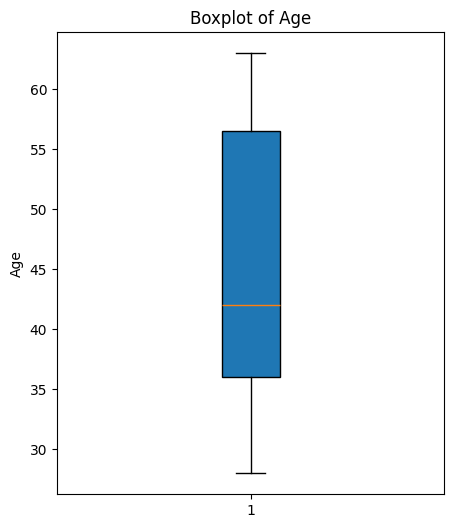

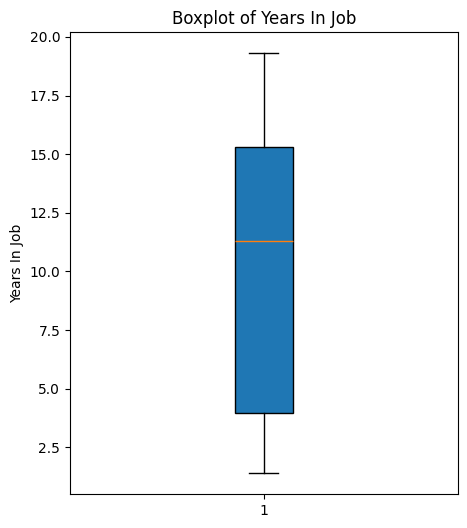

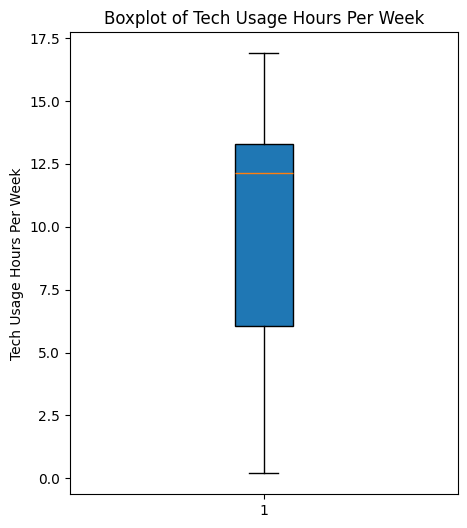

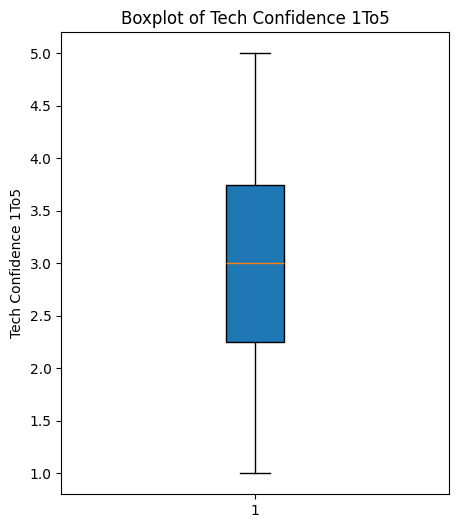

In [ ]:
vars_to_plot = ['age','years_in_job','tech_usage_hours_per_week','tech_confidence_1to5']

for col in vars_to_plot:
    if col in df.columns:
        plt.figure(figsize=(5,6))
        plt.boxplot(df[col].dropna(), vert=True, patch_artist=True)
        plt.title(f'Boxplot of {col.replace("_"," ").title()}')
        plt.ylabel(col.replace("_"," ").title())
        plt.show()

**Categorical Variables**

Categorical variables place participants into groups or categories instead of giving them a score on a scale. In our study, examples include:

* Language spoken at home (English vs. Other)
* Education level (High school, Diploma, Bachelor, Postgraduate)
* Job title (Residential aged care worker, Community care worker)
* Completed task (Yes/No)

Because these are groups, we analyse them differently from continuous variables:

* Summarise them with counts and percentages
* How many participants fall into each group?

Example: 50% of participants spoke English at home.

*Visualise them with bar charts or pie charts*

Helps us quickly see the largest and smallest groups.

In [ ]:
# Categorical examples (edit as needed)
cat_summaries = {}
for col in ['language_spoken_at_home','education_level','job_title','device_most_often','completed']:
    if col in df.columns:
        vc = df[col].value_counts(dropna=False)
        cat_summaries[col] = pd.DataFrame({'count': vc, 'percent': (vc/len(df)*100).round(1)})
cat_summaries

{'language_spoken_at_home':                          count  percent
 language_spoken_at_home                
 English                      5     50.0
 Mandarin                     1     10.0
 Hindi                        1     10.0
 Arabic                       1     10.0
 Vietnamese                   1     10.0
 Spanish                      1     10.0,
 'education_level':                      count  percent
 education_level                    
 High school              4     40.0
 Certificate/Diploma      4     40.0
 Postgraduate             1     10.0
 Bachelor                 1     10.0,
 'job_title':                               count  percent
 job_title                                   
 Residential Aged Care Worker      5     50.0
 Community Care Worker             5     50.0,
 'device_most_often':                    count  percent
 device_most_often                
 Smartphone             5     50.0
 iPad/Tablet            4     40.0
 Desktop                1     10.0,
 'compl

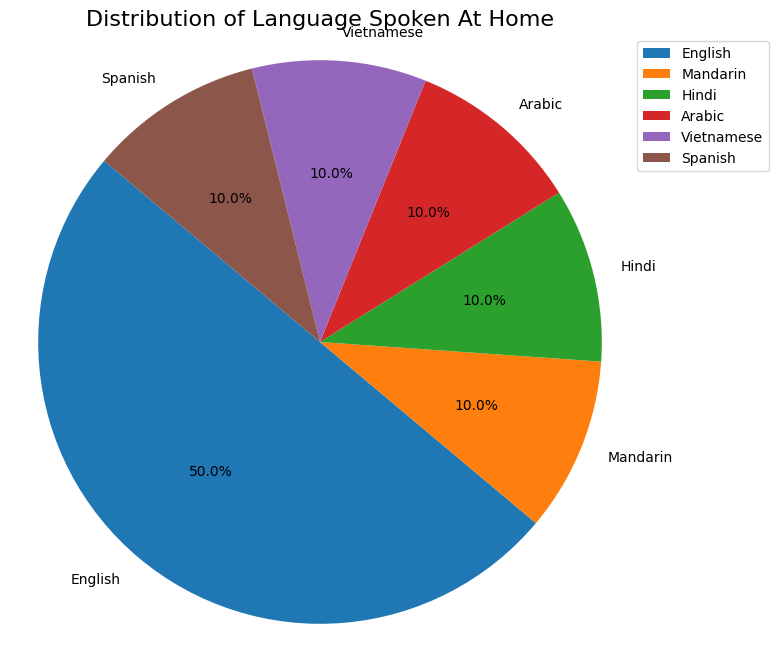

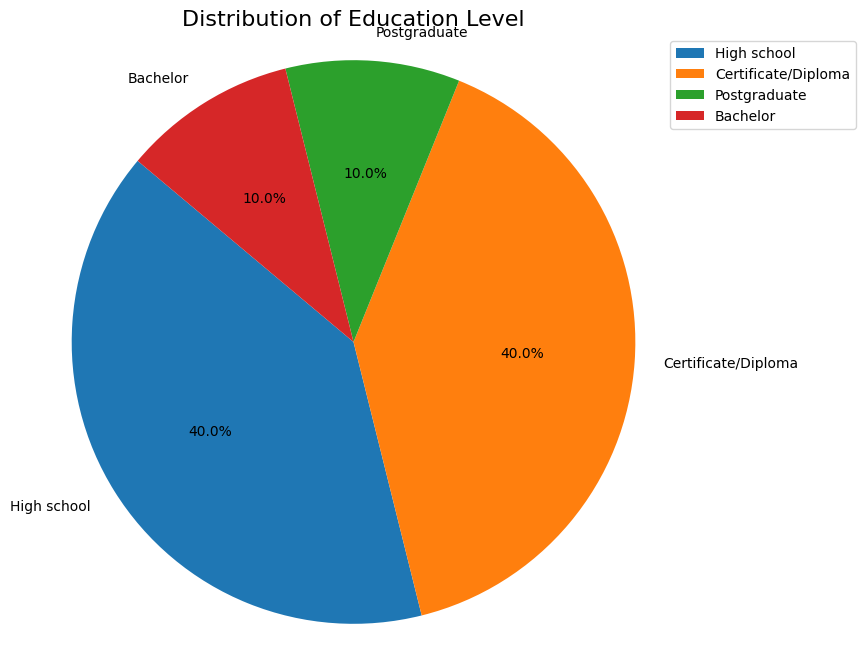

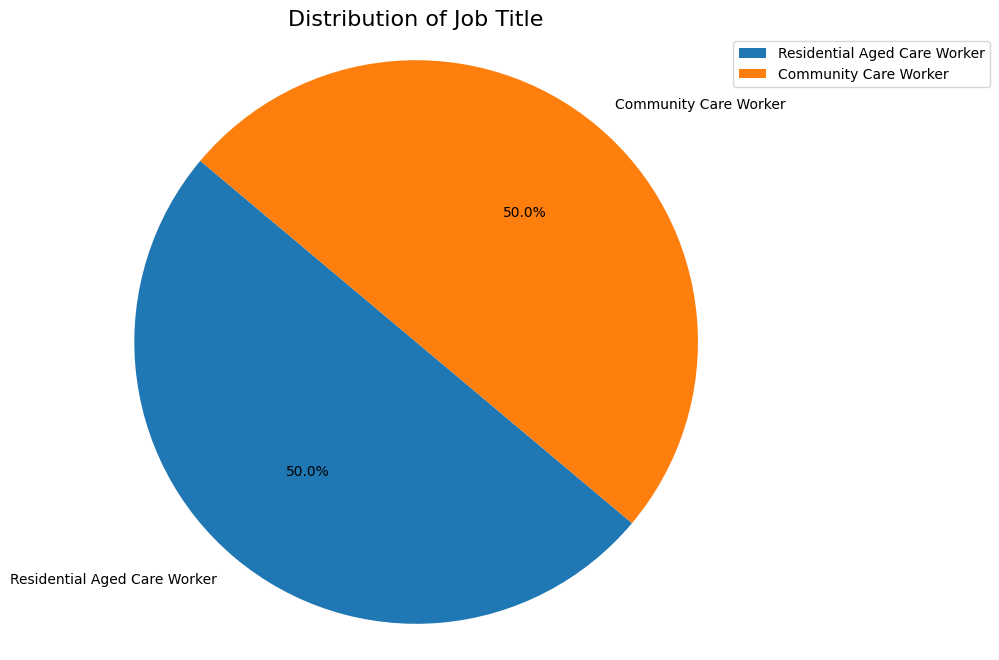

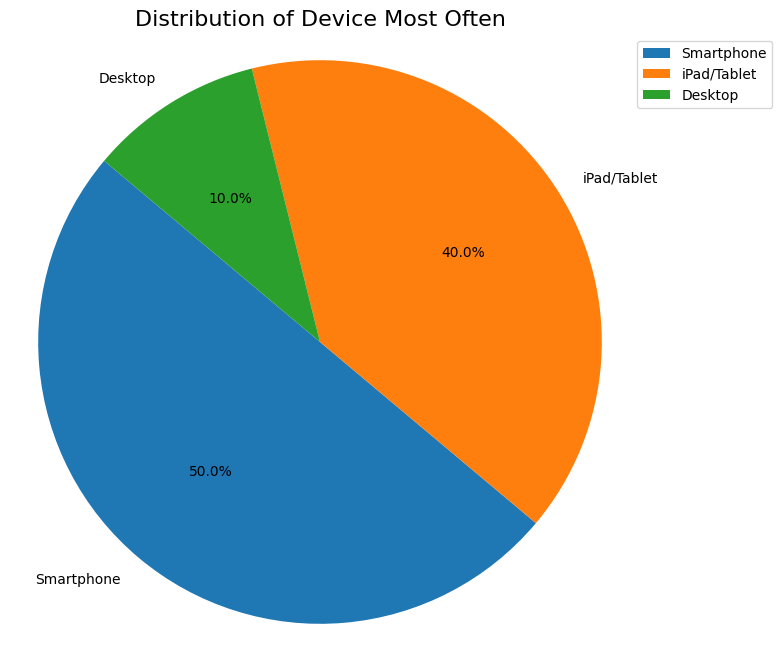

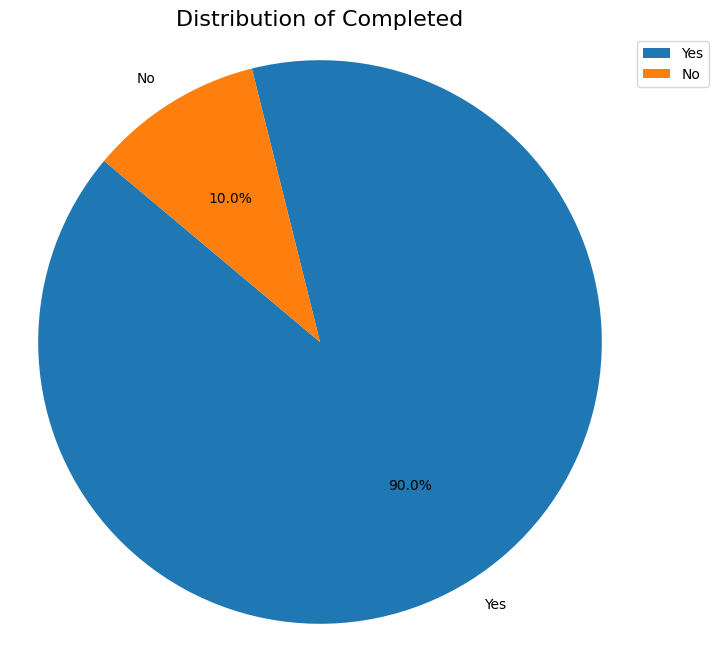

In [ ]:
for col, summary_df in cat_summaries.items():
    # Create a figure and axes for the pie chart
    plt.figure(figsize=(8, 8))

    # Plot the pie chart
    plt.pie(
        summary_df['count'],
        labels=summary_df.index,
        autopct='%1.1f%%',
        startangle=140
    )

    # Set the title of the pie chart
    plt.title(f'Distribution of {col.replace("_", " ").title()}', fontsize=16)

    # Add a legend to the chart
    plt.legend(summary_df.index, loc='upper left', bbox_to_anchor=(1, 1))

    # Ensure the pie is a circle
    plt.axis('equal')

    # Display the plot in the notebook
    plt.show()

# Evaluation Results

Now let's look at the evaluation results just as simple descriptive statisitcs - so the overall results from the evaluations.

In [ ]:
cont_cols = [c for c in ['time_sec','errors','sus_total','ee_mean','fc_mean'] if c in df.columns]
desc_cont = df[cont_cols].describe().T if cont_cols else pd.DataFrame()
desc_cont

,count,mean,std,min,25%,50%,75%,max
time_sec,10.0,58.900,19.023085,40.00,43.5000,55.50,67.5000,99.00
errors,10.0,1.500,2.121320,0.00,0.0000,1.00,2.0000,7.00
sus_total,10.0,49.500,4.972145,40.00,47.5000,50.00,51.8750,57.50
ee_mean,10.0,5.325,0.553399,4.25,5.0000,5.50,5.7500,6.00
fc_mean,10.0,4.900,0.801041,3.75,4.3125,4.75,5.5625,6.25


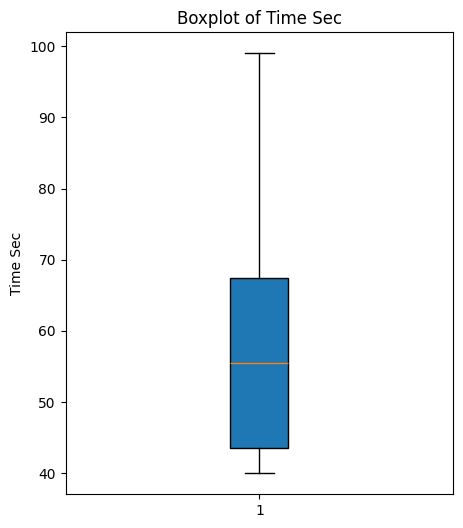

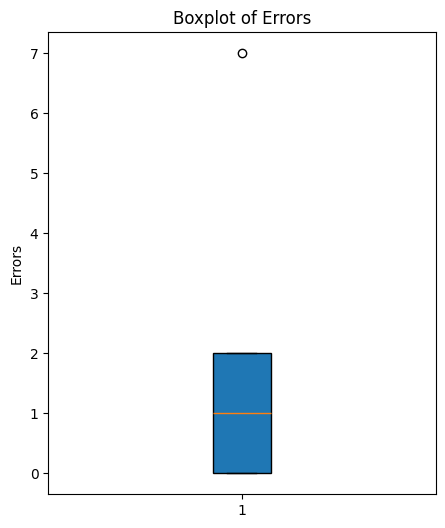

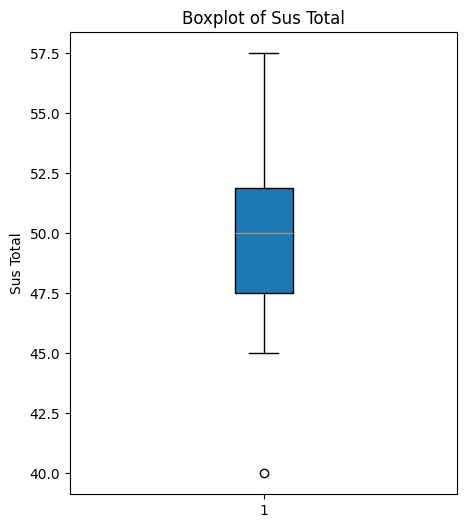

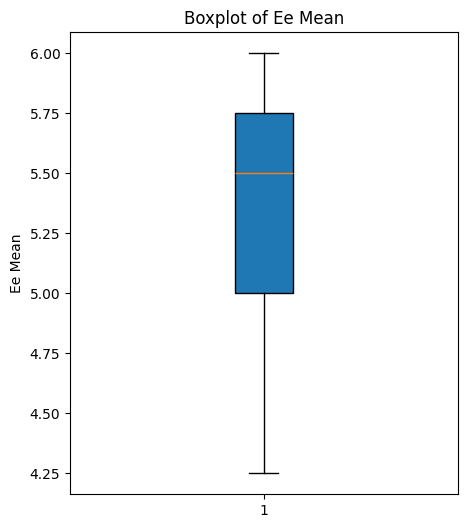

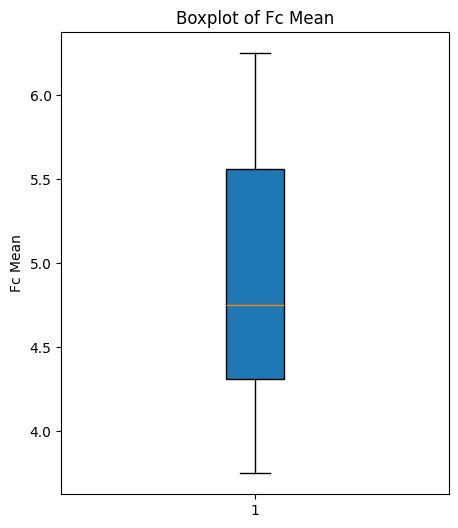

In [ ]:
vars_to_plot = ['time_sec','errors','sus_total','ee_mean','fc_mean']

for col in vars_to_plot:
    if col in df.columns:
        plt.figure(figsize=(5,6))
        plt.boxplot(df[col].dropna(), vert=True, patch_artist=True)
        plt.title(f'Boxplot of {col.replace("_"," ").title()}')
        plt.ylabel(col.replace("_"," ").title())
        plt.show()

# Relationships

So far, we’ve described what each variable looks like on its own. The next step is to see if variables are related to each other. This helps us answer questions like:

* *Do older participants take longer to complete the task?*
* *Does technology confidence relate to higher SUS scores?*
* *Do job roles differ in their usability ratings?*
* *Is completion success linked to language spoken at home?*

To do this, we use different statistical tests depending on the type of variables:


**Correlation (continuous ↔ continuous)**

* Checks if two variables move together.
* Example: Does age increase as time to complete task increases?
* Results: An “r” value (strength and direction of relationship) and a p-value (evidence for the relationship).


**t-test (categorical ↔ continuous, two groups)**

* Compares the mean score of a continuous variable between two groups.
* Example: Do aged care workers vs community care workers differ in SUS scores?

**ANOVA (categorical ↔ continuous, 3+ groups)**

* Like a t-test but for more than two groups.
* Example: Does education level (high school, diploma, bachelor, postgraduate) relate to differences in SUS scores?

**Chi-square test (categorical ↔ categorical)**

* Looks for associations between two categorical variables.
* Example: Is task completion (Yes/No) related to language group (English vs Other)?

Important: These tests show patterns and associations, not cause and effect. Always link results back to what they mean for usability and design decisions.

***You will need to choose which of these tests is appropriate based on the data you have collected.  Below we provide examples of each.***



# Correlation Test

**What it does:**
Correlation checks whether two continuous variables move together. It gives us:

r value: tells us the strength and direction of the relationship.
* Positive r → as one goes up, the other tends to go up.
* Negative r → as one goes up, the other tends to go down.
* Close to 0 → little or no linear relationship.

p value: tells us how much evidence there is that the relationship is real (p < 0.05 usually means it’s worth noting).

*Example question:*

**Do older participants take longer to complete the task?**

Correlation between Age and Task Time
r = -0.49, p = 0.154, n = 10


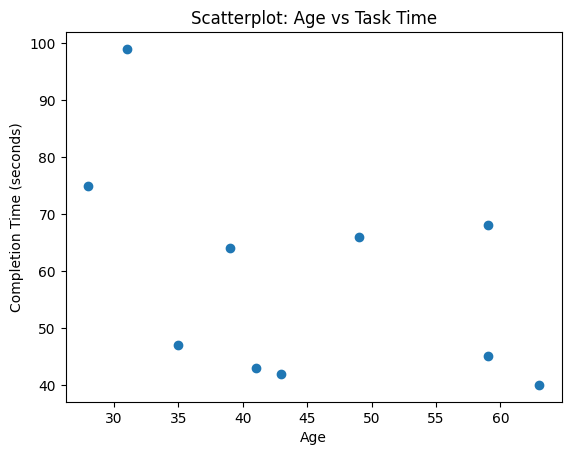

In [ ]:
# Make sure the variables exist and are numeric
x = pd.to_numeric(df['age'], errors='coerce')
y = pd.to_numeric(df['time_sec'], errors='coerce')

# Drop rows with missing values
valid = x.notna() & y.notna()
x_valid, y_valid = x[valid], y[valid]

# Run Pearson correlation (linear relationship)
r, p = stats.pearsonr(x_valid, y_valid)

print(f"Correlation between Age and Task Time")
print(f"r = {r:.2f}, p = {p:.3f}, n = {len(x_valid)}")

# Quick scatterplot to visualise
import matplotlib.pyplot as plt
plt.scatter(x_valid, y_valid)
plt.xlabel("Age")
plt.ylabel("Completion Time (seconds)")
plt.title("Scatterplot: Age vs Task Time")
plt.show()

**How to report**

There was a moderate negative correlation between age and task completion time (r = –0.49, p = .15, n = 10). This suggests that older participants tended to complete the task faster, although the relationship was not statistically significant.

# Correlation Matrix

**Understanding Correlation Matrices**

A correlation matrix is a table (or heatmap) that shows how strongly pairs of variables are related. It gives you a big-picture view of the relationships in your dataset, helping you quickly spot patterns worth exploring further.

* Pearson correlation assumes a linear relationship and works best when variables are roughly normally distributed.

* Spearman correlation looks at the rank order instead of raw values, so it’s more robust for skewed data (e.g., error counts, Likert scales) or when relationships are monotonic but not strictly linear.

Both correlations range from –1 to +1:

* Positive → as one increases, the other tends to increase.

* Negative → as one increases, the other tends to decrease.

* Near 0 → little or no relationship.

**Why are correlation matrices useful?**

* They let you scan multiple variables at once, instead of testing pairs one by one.

* You can spot interesting trends (e.g., higher tech confidence tends to go with higher SUS scores).

* They help identify potential predictors: variables that might influence performance or perceptions.

* They can also reveal redundancies: variables that are so strongly related they may be measuring the same thing.

**How to use them in your analysis**

1. Look for stronger correlations (e.g., |r| > .30). These are the ones most likely to be meaningful.

2. Check both Pearson and Spearman if your sample is small or your data isn’t normally distributed.

3. Don’t stop at the matrix — use scatterplots or individual tests (correlation, t-test, ANOVA) to confirm and interpret.

4. Report selectively: Don’t list the whole matrix; instead, highlight 1–2 relationships that are most relevant to your usability findings.

5. Always link back to design implications: e.g., “Participants who made more errors tended to give lower usability ratings, suggesting that reducing errors could improve perceived usability.”

**Best practice: Use the correlation matrix as a map to guide your deeper analysis, not as the final result.**

Pearson Correlation Matrix:


,age,years_in_job,tech_usage_hours_per_week,tech_confidence_1to5,time_sec,errors,sus_total,ee_mean,fc_mean
age,1.00,-0.71,0.04,-0.48,-0.49,-0.42,0.40,-0.39,-0.49
years_in_job,-0.71,1.00,0.01,0.06,0.36,0.25,-0.27,0.60,0.05
tech_usage_hours_per_week,0.04,0.01,1.00,-0.02,-0.08,0.03,-0.69,-0.47,0.29
tech_confidence_1to5,-0.48,0.06,-0.02,1.00,0.26,0.48,-0.20,0.07,0.51
time_sec,-0.49,0.36,-0.08,0.26,1.00,0.67,0.19,-0.02,0.46
errors,-0.42,0.25,0.03,0.48,0.67,1.00,0.08,-0.32,0.62
sus_total,0.40,-0.27,-0.69,-0.20,0.19,0.08,1.00,-0.04,-0.36
ee_mean,-0.39,0.60,-0.47,0.07,-0.02,-0.32,-0.04,1.00,-0.25
fc_mean,-0.49,0.05,0.29,0.51,0.46,0.62,-0.36,-0.25,1.00


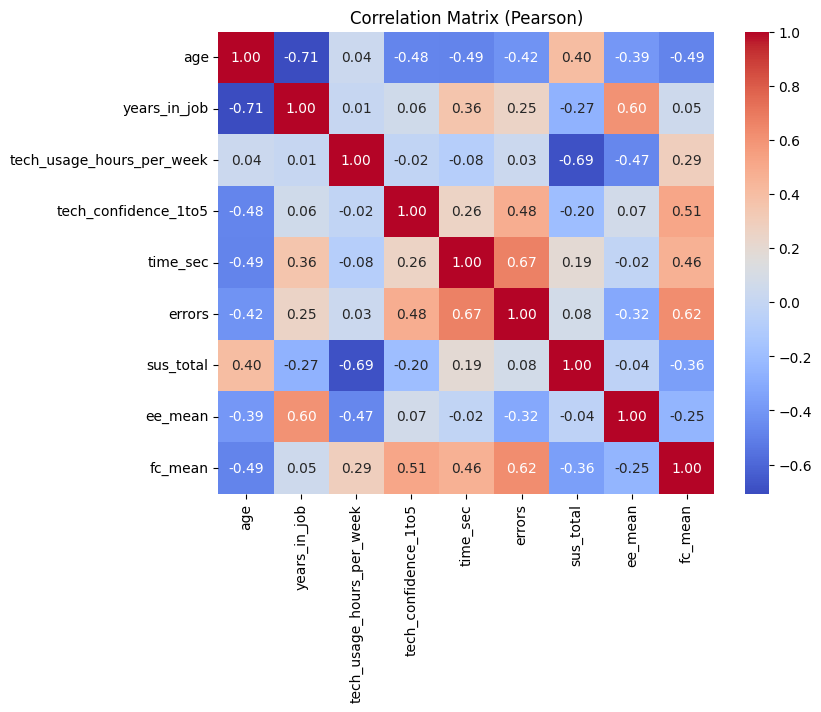

Spearman Correlation Matrix:


,age,years_in_job,tech_usage_hours_per_week,tech_confidence_1to5,time_sec,errors,sus_total,ee_mean,fc_mean
age,1.00,-0.66,0.16,-0.54,-0.57,-0.39,0.34,-0.37,-0.55
years_in_job,-0.66,1.00,-0.12,0.09,0.26,0.10,-0.26,0.64,0.02
tech_usage_hours_per_week,0.16,-0.12,1.00,-0.10,-0.04,0.10,-0.71,-0.41,0.21
tech_confidence_1to5,-0.54,0.09,-0.10,1.00,0.26,0.31,-0.02,0.12,0.45
time_sec,-0.57,0.26,-0.04,0.26,1.00,0.43,0.07,-0.07,0.53
errors,-0.39,0.10,0.10,0.31,0.43,1.00,-0.03,-0.38,0.44
sus_total,0.34,-0.26,-0.71,-0.02,0.07,-0.03,1.00,-0.08,-0.31
ee_mean,-0.37,0.64,-0.41,0.12,-0.07,-0.38,-0.08,1.00,-0.26
fc_mean,-0.55,0.02,0.21,0.45,0.53,0.44,-0.31,-0.26,1.00


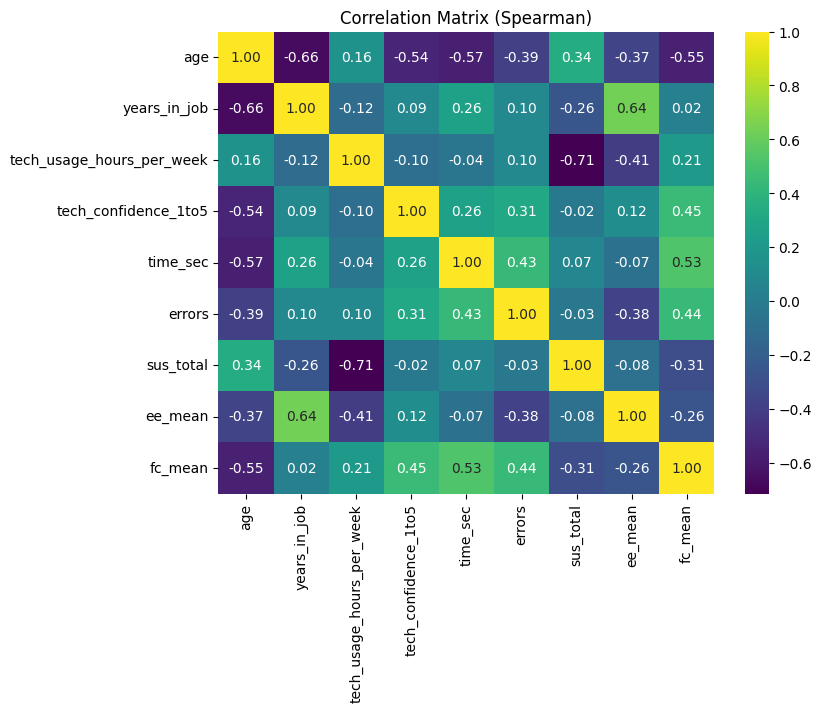

In [ ]:
# Continuous variables to include
cont_vars = [
    'age',
    'years_in_job',
    'tech_usage_hours_per_week',
    'tech_confidence_1to5',
    'time_sec',
    'errors',
    'sus_total',
    'ee_mean',
    'fc_mean'
]

# Keep only available variables in the dataset
available_vars = [c for c in cont_vars if c in df.columns]

# --- Pearson correlation matrix ---
pearson_corr = df[available_vars].corr(method='pearson')

print("Pearson Correlation Matrix:")
display(pearson_corr.round(2))

plt.figure(figsize=(8,6))
sns.heatmap(pearson_corr, annot=True, fmt=".2f", cmap="coolwarm", cbar=True)
plt.title("Correlation Matrix (Pearson)")
plt.show()

# --- Spearman correlation matrix ---
spearman_corr = df[available_vars].corr(method='spearman')

print("Spearman Correlation Matrix:")
display(spearman_corr.round(2))

plt.figure(figsize=(8,6))
sns.heatmap(spearman_corr, annot=True, fmt=".2f", cmap="viridis", cbar=True)
plt.title("Correlation Matrix (Spearman)")
plt.show()

**How to report results from a correlation matrix**

A correlation matrix shows all the pairwise correlations, but you don’t report everything. Instead:

1. Scan for interesting values: Look for correlations that are stronger (e.g., above ±0.30) or surprising.

2. Check the direction: Positive (both increase together) or negative (one goes up, the other goes down).

3. Write a clear sentence: Report the strength, direction, and p-value if tested individually.

Example reporting sentences:

*From the Pearson matrix:*

“Technology confidence was positively correlated with SUS scores (r = .42, p = .04), suggesting that participants who felt more confident with technology rated the app as more usable.”

*From the Spearman matrix:*

“Number of errors showed a negative correlation with SUS scores (ρ = –.38, p = .07). Participants who made more errors tended to give lower usability ratings, although this was not statistically significant.”

**Some tips**

* Use r for Pearson correlations and ρ (rho) for Spearman correlations.

* Don’t just list numbers — explain what they mean for usability and design.

* Avoid over-interpreting weak (close to 0) or non-significant correlations, but you can still describe trends.

# t-test

A t-test compares the mean score of a continuous variable between two groups.

The test gives us:

* t value: the difference between group means relative to the spread of scores.
* p value: evidence for whether the difference is likely to be real.
* Means (M) and standard deviations (SD): show what each group scored on average.

*Example question:*

Do aged care workers and community care workers differ in their SUS scores?

In [ ]:
# Subset to relevant data
sub = df[['job_title','sus_total']].dropna()
groups = sub['job_title'].unique()

if len(groups) == 2:
    g1 = sub[sub['job_title'] == groups[0]]['sus_total'].astype(float)
    g2 = sub[sub['job_title'] == groups[1]]['sus_total'].astype(float)

    # Welch’s t-test (does not assume equal variances)
    t_stat, p_val = stats.ttest_ind(g1, g2, equal_var=False, nan_policy='omit')

    # Descriptives
    n1, n2 = len(g1), len(g2)
    m1, m2 = g1.mean(), g2.mean()
    sd1, sd2 = g1.std(ddof=1), g2.std(ddof=1)

    # Welch–Satterthwaite degrees of freedom
    se1 = sd1**2 / n1
    se2 = sd2**2 / n2
    df_welch = (se1 + se2)**2 / ((se1**2)/(n1 - 1) + (se2**2)/(n2 - 1))

    # Build neat summary table (blank cells instead of NaN where not applicable)
    results = pd.DataFrame({
        "Group": [groups[0], groups[1], "t-test (Welch)"],
        "n": [n1, n2, n1 + n2],
        "Mean SUS": [round(m1, 2), round(m2, 2), ""],
        "SD": [round(sd1, 2), round(sd2, 2), ""],
        "t": ["", "", round(t_stat, 2)],
        "df": ["", "", round(df_welch, 2)],
        "p": ["", "", f"{p_val:.3f}"]
    })

    display(results)
else:
    print("t-test requires exactly 2 groups.")

,Group,n,Mean SUS,SD,t,df,p
0,Residential Aged Care Worker,5,47.5,4.33,,,
1,Community Care Worker,5,51.5,5.18,,,
2,t-test (Welch),10,,,-1.32,7.75,0.223


Note:

* It’s normal for the group rows to have empty t/df/p cells — those stats apply to the test row only.
* We use Welch’s t-test (default above) because it’s more robust when group variances or sizes differ.

**How to report:**

**If p < .05:**

“SUS scores differed significantly between residential aged care workers (M = 72.4, SD = 8.2) and community care workers (M = 65.8, SD = 7.9), t(8) = 2.45, p = .04.”

**If p > .05:**

“There was no significant difference in SUS scores between residential aged care workers (M = 72.4, SD = 8.2) and community care workers (M = 65.8, SD = 7.9), t(8) = 1.32, p = .22.”

Always report the means and SDs for each group, even when the test isn’t significant.

# ANOVA

**What it does:**

ANOVA (Analysis of Variance) compares the mean scores of a continuous variable across three or more groups.

The test gives us:

* F value: ratio of variation between groups to variation within groups.
* p value: evidence for whether the differences between groups are likely real.
* Group means (M) and standard deviations (SD).

*Example Question:*

Do SUS scores differ across education levels (high school, diploma, bachelor, postgraduate)?

In [ ]:
import pandas as pd
from scipy import stats

# Subset to relevant columns
sub = df[['education_level','sus_total']].dropna()

# Prepare groups
groups = [grp['sus_total'].values for name, grp in sub.groupby('education_level') if len(grp) > 0]

if len(groups) >= 3:
    # Run one-way ANOVA
    f_stat, p_val = stats.f_oneway(*groups)

    # Build group-level descriptives
    rows = []
    for name, grp in sub.groupby('education_level'):
        rows.append({
            "Group": name,
            "n": len(grp),
            "Mean SUS": round(grp['sus_total'].mean(), 2),
            "SD": round(grp['sus_total'].std(ddof=1), 2),
            "F": "",
            "df": "",
            "p": ""
        })

    # Add overall ANOVA row
    rows.append({
        "Group": "ANOVA",
        "n": len(sub),
        "Mean SUS": "",
        "SD": "",
        "F": round(f_stat, 2),
        "df": f"{len(groups)-1}, {len(sub)-len(groups)}",
        "p": f"{p_val:.3f}"
    })

    results = pd.DataFrame(rows)
    display(results)
else:
    print("ANOVA requires at least 3 groups.")

,Group,n,Mean SUS,SD,F,df,p
0,Bachelor,1,40.0,NaN,,,
1,Certificate/Diploma,4,49.38,3.15,,,
2,High school,4,50.62,4.73,,,
3,Postgraduate,1,55.0,NaN,,,
4,ANOVA,10,,,2.59,"3, 6",0.148


**Interpreting ANOVA results with small groups**

Sometimes, when you run ANOVA on your data, you might see results like:

* NaN for SD → This happens when a group only has one participant. Standard deviation measures the spread of scores, and you can’t calculate spread with a single data point.
* Very small group sizes (n = 1 or 2) → ANOVA is less reliable because it assumes you have enough data in each group to estimate variation.
* Non-significant p-values (p > .05) → This means there isn’t strong evidence that the groups differ in their SUS scores. It doesn’t mean there’s no difference, just that we can’t be confident about it with the current sample.

👉 How to handle this in your reporting:

* Clearly report what you found: group means, SDs, and the ANOVA result (F, df, p).
* Point out if small group sizes limit the reliability of the test.
* Focus on what the results suggest for design — e.g., “Although postgraduate participants had slightly higher SUS scores, this finding is based on only one person and cannot be generalised.”

# Chi-square Test of Independence

The Chi-square test looks for an association between two categorical variables.

The test gives us:

* χ² value: how different the observed counts are from what we’d expect if the variables were unrelated.
* p value: evidence for whether the association is likely real.
* A contingency table: counts of participants in each category.

*Example: *

Is task completion (Yes/No) related to language spoken at home (English vs Other)?

In [ ]:
# Create binary language variable
lang_bin = np.where(df['language_spoken_at_home'] == 'English', 'English', 'Other')

# Ensure we have a clean completed variable
if 'completed_bool' not in df.columns:
    df['completed_bool'] = df['completed'].astype(str).str.lower().isin(['yes','y','true','1'])

completed_bin = np.where(df['completed_bool'], 'Yes', 'No')

# Build contingency table
ct = pd.crosstab(completed_bin, lang_bin)

if ct.size > 0:
    chi2, p, dof, exp = stats.chi2_contingency(ct)

    # Flatten observed counts into table rows
    rows = []
    for row_cat in ct.index:
        for col_cat in ct.columns:
            rows.append({
                "Completed": row_cat,
                "Language": col_cat,
                "Count": ct.loc[row_cat, col_cat]
            })

    # Add test result row
    rows.append({
        "Completed": "Chi-square",
        "Language": "",
        "Count": "",
        "χ²": round(chi2, 2),
        "df": dof,
        "p": f"{p:.3f}"
    })

    results = pd.DataFrame(rows)
    display(results)
else:
    print("Not enough data for Chi-square test")

,Completed,Language,Count,χ²,df,p
0,No,English,0,NaN,NaN,NaN
1,No,Other,1,NaN,NaN,NaN
2,Yes,English,5,NaN,NaN,NaN
3,Yes,Other,4,NaN,NaN,NaN
4,Chi-square,,,0.0,1.0,1.000


**What this tells us:**

* Very small counts: One cell has only 1 participant, and another has 0. Chi-square assumes each expected cell count is at least ~5 to be reliable. When cells are this small, the test result can’t really be trusted.

* χ²(1) = 0.0, p = 1.000: The test found no evidence of an association between task completion and language group. In fact, the counts are almost identical across groups, so there’s nothing for the test to detect.

* NaN cells in the table: These are just blanks — the test statistics only appear in the final row.

**How to handle this in your reporting:**

* Report the counts first (e.g., “5 English speakers and 4 non-English speakers completed the task successfully; 0 English speakers and 1 non-English speaker did not.”).

* Then report the test result (e.g., “A Chi-square test found no significant association between completion and language group, χ²(1) = 0.0, p = 1.00.”).

* Add a caution about small sample sizes (e.g., “Because some cells had very few participants, these results should be interpreted cautiously.”).

# Key Points for Analysis

In this notebook, you have:

* Learned how to summarise your data with descriptive statistics and visualisations.

* Practised running common statistical tests (correlation, t-test, ANOVA, Chi-square) to explore relationships between variables.

* Seen how to report results clearly, with both the numbers and what they mean for usability and design.

**Suggested workflow for your analysis**

1. Clean and prepare your dataset: Check for missing values, derive scores (e.g., SUS, UTAUT-2 subscales).

2. Start with descriptive statistics about **participants**: Report means, SDs, counts, and create simple charts.

3. Start with descriptive statistics about **results**: Report means, SDs, counts, and create simple charts.

4. Explore relationships: Use a correlation matrix to spot potential links.

5. Run specific tests (correlation, t-test, ANOVA, Chi-square) depending on your variable types.

**Report your findings**

* Always include descriptives (M, SD, counts) alongside test statistics.

* Use plain language to explain what the numbers mean.

* Link results back to usability insights and design implications.

**A final reminder**

The analyses shown here are examples. Your dataset may require different approaches, and not every test shown will be appropriate for your variables. Always:

* Choose the test that fits your research question and data type.

* Note any limitations (e.g., small sample sizes, skewed data).

* Focus on what the results mean for design and usability, not just the statistics.

**Use this notebook as a guide and toolkit, but apply critical thinking to decide which analyses best support your project.**